1. You have been given a partially implemented code for a feed-forward neural network using PyTorch. Your task is to complete the missing parts of the code to make it functional.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        return x

# Define the hyperparameters
input_size = 10
hidden_size = 20
label_size = 5
learning_rate = 0.001
num_epochs = 1000

batch_size = 8
# Create the neural network object
model = NeuralNetwork(input_size, hidden_size, label_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Generate some dummy data for training
train_data = torch.randn(100, input_size)
train_labels = torch.randint(label_size, (100,))

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    for batch in range(0, len(train_data), batch_size):
    # Complete this line to pass the training data through the model and obtain the predictions
        x_batch = train_data[batch : batch + batch_size]
        y_batch = train_labels[batch : batch + batch_size]
        outputs = model(x_batch)

    # Compute the loss
        loss = criterion(outputs, y_batch)

    # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Test the trained model
test_data = torch.randn(10, input_size)
with torch.no_grad():
    # Complete this line to pass the test data through the model and obtain the predictions
    test_outputs = model(test_data)

    # Print the predictions
    _, predicted = torch.max(test_outputs.data, 1)
    print("Predictions:", predicted)

Epoch: 100/1000, Loss: 1.5867146253585815
Epoch: 100/1000, Loss: 1.6222254037857056
Epoch: 100/1000, Loss: 1.6302237510681152
Epoch: 100/1000, Loss: 1.6449151039123535
Epoch: 100/1000, Loss: 1.559964895248413
Epoch: 100/1000, Loss: 1.6261682510375977
Epoch: 100/1000, Loss: 1.612883448600769
Epoch: 100/1000, Loss: 1.595059871673584
Epoch: 100/1000, Loss: 1.660547137260437
Epoch: 100/1000, Loss: 1.5427895784378052
Epoch: 100/1000, Loss: 1.565189242362976
Epoch: 100/1000, Loss: 1.6271344423294067
Epoch: 100/1000, Loss: 1.552393913269043
Epoch: 200/1000, Loss: 1.5915626287460327
Epoch: 200/1000, Loss: 1.599044680595398
Epoch: 200/1000, Loss: 1.630333662033081
Epoch: 200/1000, Loss: 1.6451247930526733
Epoch: 200/1000, Loss: 1.549209713935852
Epoch: 200/1000, Loss: 1.6121277809143066
Epoch: 200/1000, Loss: 1.5983821153640747
Epoch: 200/1000, Loss: 1.582897424697876
Epoch: 200/1000, Loss: 1.6544421911239624
Epoch: 200/1000, Loss: 1.5279253721237183
Epoch: 200/1000, Loss: 1.5589934587478638
Ep

2. In this coding exercise, you need to implement the training of a deep MLP on the MNIST dataset using PyTorch and manually tune the hyperparameters. Follow the steps below to proceed:

* Load the MNIST dataset using torchvision.datasets.MNIST. The dataset contains handwritten digit images, and it can be easily accessed through PyTorch's torchvision module.

## Import the necessary libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np
torch.random.manual_seed(42)

## Load the MNIST dataset

In [3]:
# Load the MNIST dataset
train_data = datasets.MNIST(root=".", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root=".", train=False, download=True, transform=ToTensor())

## Dataset Batching

In [4]:
batch_size = 256
#  Create data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

* Define your deep MLP model. Specify the number of hidden layers, the number of neurons in each layer, and the activation function to be used. You can use the nn.Sequential container to stack the layers.

## Create the model architecture

In [5]:
class MLP(nn.Module):
    def __init__(self, features_num: int, labels_num: int):
        super().__init__()
        # TODO
        self.flatten = nn.Flatten()
        self.act = nn.ReLU()
        self.act_output = nn.Softmax()
        # nn.LogSoftmax(dim=1)
        self.bn_H1 = nn.BatchNorm1d(30)
        self.bn_H2 = nn.BatchNorm1d(20)
        self.bn_input = nn.BatchNorm1d(features_num)
        self.bn_output = nn.BatchNorm1d(10)
        self.layer_H1 = nn.Linear(features_num, 30) 
        self.layer_H2 = nn.Linear(30, 20)
        self.layer_output = nn.Linear(20, labels_num)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.bn_input(x)
        x = self.act(self.bn_H1(self.layer_H1(x)))
        x = self.act(self.bn_H2(self.layer_H2(x)))
        x = self.act_output(self.bn_output(self.layer_output(x)))
        return x

* Set up the training loop and the hyperparameters. You can use the CrossEntropyLoss as the loss function and the Stochastic Gradient Descent (SGD) optimizer.

## Set the hyperparameters

In [6]:
learning_rate = 4.86E-03    # Note: The LR suggestion
epochs = 100

## Create an instance of the model

In [7]:
# Create an instance of the model
model_MNIST = MLP(784, 10)

## Set the loss function and optimizer

In [76]:
criterion = nn.CrossEntropyLoss()  
optimizer = optim.SGD(model_MNIST.parameters(), lr = learning_rate, momentum=0.5)

* Train the model by iterating over the training dataset for the specified number of epochs. Compute the loss, perform backpropagation, and update the model's parameters. 

## Training loop

In [60]:
# Training loop
for epoch in range(epochs):
    # print(f'EPOCH {epoch + 1}:')
    for images, labels in train_loader:
#         # Flatten the images
        images = images.view(-1, 784)
        predic_labels = model_MNIST(images)
#         # Zero the gradients
        optimizer.zero_grad()
#         # Forward pass
        loss = criterion(predic_labels, labels)
#         # Backward pass and optimization
        loss.backward()
        optimizer.step()
    # print(f'loss: {loss}')

* Evaluate the trained model on the test dataset and calculate the accuracy (Please take a moment to consider the code below!)

## Evaluation the model

In [61]:
# Evaluation
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 784)
        outputs = model_MNIST(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 96.14%


* Manually tune the hyperparameters, such as the learning rate, by experimenting with different values and observing the performance. You can also search for the optimal learning rate by using techniques like learning rate range test, where you gradually increase the learning rate and monitor the loss.

## Identify an appropriate learning rate (LRFinder approach)

In [45]:
try:
    from torch_lr_finder import LRFinder
except ImportError:
    # Run from source
    import sys
    sys.path.insert(0, '..')
    from torch_lr_finder import LRFinder

/home/ubuntu/Machine Learning Bootcamp/ML Advanced/DL_venv/lib/python3.10/site-packages/torch_lr_finder/lr_finder.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 81.62it/s]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.86E-03


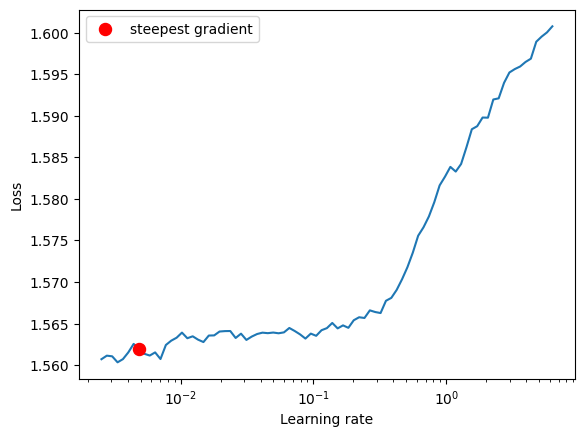

In [58]:
lr_finder = LRFinder(model_MNIST, optimizer, criterion)
lr_finder.range_test(train_loader, end_lr=10, num_iter=100, step_mode="exp")
lr_finder.plot()
lr_finder.reset()

3. In this coding exercise, you'll have an opportunity to explore the behavior of a deep neural network trained on the CIFAR10 image dataset. Follow the steps below:

* a. Construct a deep neural network (DNN) using 20 hidden layers, each comprising 100 neurons. To facilitate this exploration, employ the Swish activation function for each layer. Utilize nn.ModuleList to manage the layers effectively.

* b. Load the CIFAR10 dataset for training your network. Utilize the appropriate function, such as torchvision.datasets.CIFAR10. The dataset consists of 60,000 color images, with dimensions of 32×32 pixels. It is divided into 50,000 training samples and 10,000 testing samples. With 10 classes in the dataset, ensure that your network has a softmax output layer comprising 10 neurons. When modifying the model's architecture or hyperparameters, conduct a search to identify an appropriate learning rate. Implement early stopping during training and employ the Nadam optimization algorithm.

* c. Experiment by adding batch normalization to your network. Compare the learning curves obtained with and without batch normalization. Analyze whether the model converges faster with batch normalization and observe any improvements in its performance. Additionally, assess the impact of batch normalization on training speed.

* d. As an additional experiment, substitute batch normalization with SELU (Scaled Exponential Linear Units). Make the necessary adjustments to ensure the network self-normalizes. This involves standardizing the input features, initializing the network's weights using LeCun normal initialization (nn.init.kaiming_normal_), and ensuring that the DNN consists solely of dense layers. Observe the effects of utilizing SELU activation and self-normalization on the network's training stability and performance.

## Load the CIFAR10 dataset
  ###  Splitting dataset to the train, validation, and test subsets

In [31]:
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.1307), std=(0.3081,))])

train_val_CIFAR10 = datasets.CIFAR10(root=".", train=True, download=True, transform=transform)
test_CIFAR10 = datasets.CIFAR10(root=".", train=False, download=True, transform=transform)

train_CIFAR10, val_CIFAR10= random_split(train_val_CIFAR10, [40000, 10000])

Files already downloaded and verified
Files already downloaded and verified


## Dataset Batching

In [32]:
# Create data loaders
batch_size_ = 256

train_loader_ = DataLoader(train_CIFAR10, batch_size=batch_size_, shuffle=True)
val_loader_ = DataLoader(val_CIFAR10, batch_size=batch_size_, shuffle=True)
test_loader_ = DataLoader(test_CIFAR10, batch_size=batch_size_, shuffle=True)

## Define the Swish Function

In [33]:
 class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

# Create the model architecture (with batch normalization)

In [34]:
# Creating the network architecture with batch normalization
class CIFAR10_NN_bn(nn.Module):
    def __init__(self, features_num: int, labels_num: int, hidden_num: int, hidden_width: int, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        
        self.flatten = nn.Flatten()
        self.inputLayer = nn.Linear(features_num, hidden_width)
        self.swish = Swish()
        
        self.hiddenLayers = []
        for i in range(hidden_num):
            self.hiddenLayers.append(nn.Linear(hidden_width, hidden_width))
            
        self.hiddenLayers = nn.ModuleList(self.hiddenLayers)  # <--- causes DRAMATIC slowdown!
        self.bn_hiddenLayers = nn.BatchNorm1d(hidden_width)
        
        self.outputLayer = nn.Linear(hidden_width, labels_num)
        self.soft = nn.Softmax(dim = 1)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.swish(self.inputLayer(x))
            
        for layer in self.hiddenLayers:
            x = self.swish(self.bn_hiddenLayers(layer(x)))

        return self.soft(self.outputLayer(x))

## Set the hyperparameters

In [ ]:
learning_rate_ = 0.001
epochs_ = 100

## Create an instance of the model

In [39]:

model_CIFAR10_bn = CIFAR10_NN_bn(32 * 32 * 3, 10, 20, 100)

## Set the loss function and optimizer

In [40]:
criterion = nn.CrossEntropyLoss()  
optimizer_ = optim.NAdam(model_CIFAR10_bn.parameters(), lr = learning_rate_)

## Training loop with batch normalization

In [41]:
# to track the training loss as the model trains
train_losses_bn = []
# to track the average training loss per epoch as the model trains
avg_train_losses_bn = []

# training loop
for epoch_ in range(epochs_):
    # print(f'EPOCH {epoch + 1}:')
    for images, labels in train_loader_:
        # Flatten the images
        images = images.view(-1, 32 * 32 * 3)
        predic_labels = model_CIFAR10_bn(images)
        # Zero the gradients
        optimizer_.zero_grad()
        # Forward pass
        loss_bn = criterion(predic_labels, labels)
        # Backward pass and optimization
        loss_bn.backward()
        optimizer_.step()
        # record training loss
        train_losses_bn.append(loss_bn.item())
    # print(f'loss: {loss}')
        
# calculate average loss over an epoch
    train_loss_bn = np.average(train_losses_bn)
    avg_train_losses_bn.append(train_loss_bn)

## Evaluation the model

In [43]:
# Evaluation the model with batch normalization
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader_:
        images = images.view(-1, 32*32*3)
        outputs = model_CIFAR10_bn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 48.48%


## Identify an appropriate learning rate (LRFinder approach)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:04<00:00, 24.56it/s]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.54E-04


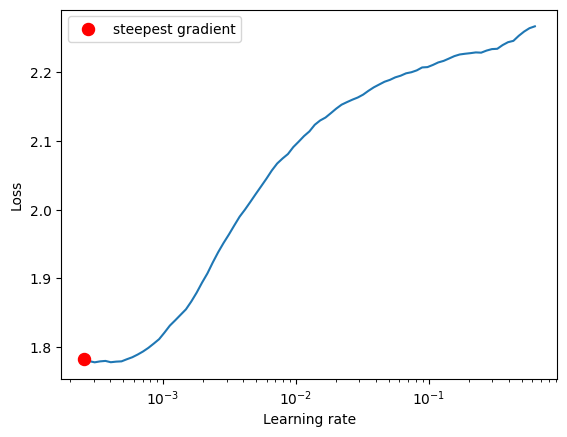

In [46]:
lr_finder_ = LRFinder(model_CIFAR10_bn, optimizer_, criterion)
lr_finder_.range_test(train_loader_, end_lr = 1, num_iter = 100, step_mode="exp")
lr_finder_.plot()
lr_finder_.reset()

# Create the model architecture (without batch normalization)

In [96]:
# Creating the network architecture without batch normalization
class CIFAR10_NN_no_bn(nn.Module):
    def __init__(self, features_num: int, labels_num: int, hidden_num: int, hidden_width: int, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        
        self.flatten = nn.Flatten()
        self.inputLayer = nn.Linear(features_num, hidden_width)
        self.swish = Swish()
        
        self.hiddenLayers = []
        for i in range(hidden_num):
            self.hiddenLayers.append(nn.Linear(hidden_width, hidden_width))
            
        self.hiddenLayers = nn.ModuleList(self.hiddenLayers)  # <--- causes DRAMATIC slowdown!
        
        self.outputLayer = nn.Linear(hidden_width, labels_num)
        self.soft = nn.Softmax(dim = 1)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.swish(self.inputLayer(x))
            
        for layer in self.hiddenLayers:
            x = self.swish(layer(x))

        return self.soft(self.outputLayer(x))

## Create an instance of the model

In [97]:

model_CIFAR10_no_bn = CIFAR10_NN_no_bn(32 * 32 * 3, 10, 20, 100)

## Training loop without batch normalization

In [98]:
# to track the training loss as the model trains
train_losses_no_bn = []
# to track the average training loss per epoch as the model trains
avg_train_losses_no_bn = []

# training loop
for epoch_ in range(epochs_):
    # print(f'EPOCH {epoch + 1}:')
    for images, labels in train_loader_:
        # Flatten the images
        images = images.view(-1, 32 * 32 * 3)
        predic_labels_ = model_CIFAR10_no_bn(images)
        # Zero the gradients
        optimizer_.zero_grad()
        # Forward pass
        loss_no_bn = criterion(predic_labels_, labels)
        # Backward pass and optimization
        loss_no_bn.backward()
        optimizer_.step()
        # record training loss
        train_losses_no_bn.append(loss_no_bn.item())
    # print(f'loss: {loss}')
        
# calculate average loss over an epoch
    train_loss_no_bn = np.average(train_losses_no_bn)
    avg_train_losses_no_bn.append(train_loss_no_bn)

## Evaluation the model

In [99]:
# Evaluation the model without batch normalization 
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader_:
        images = images.view(-1, 32*32*3)
        outputs = model_CIFAR10_no_bn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 10.00%


## Identify an appropriate learning rate (LRFinder approach and without batch normalization)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:03<00:00, 30.43it/s]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 7.05E-04


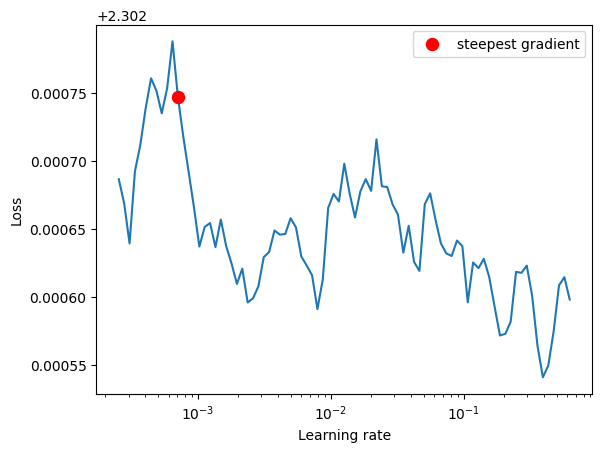

In [100]:
lr_finder_no_bn = LRFinder(model_CIFAR10_no_bn, optimizer_, criterion)
lr_finder_no_bn.range_test(train_loader_, end_lr = 1, num_iter = 100, step_mode="exp")
lr_finder_no_bn.plot()
lr_finder_no_bn.reset()

## Comparing the performance of the model with and without batch normalization

In [106]:
def plot_losses(losses, labels, title=None, figsize=(10, 5)):

    fig, ax = plt.subplots(figsize=figsize)
    for loss, label in zip(losses, labels):
        ax.plot(loss, label=label)
    ax.set_title(title)
    ax.set_ylabel('Loss')
    ax.set_xlabel('epoch')
    ax.grid()

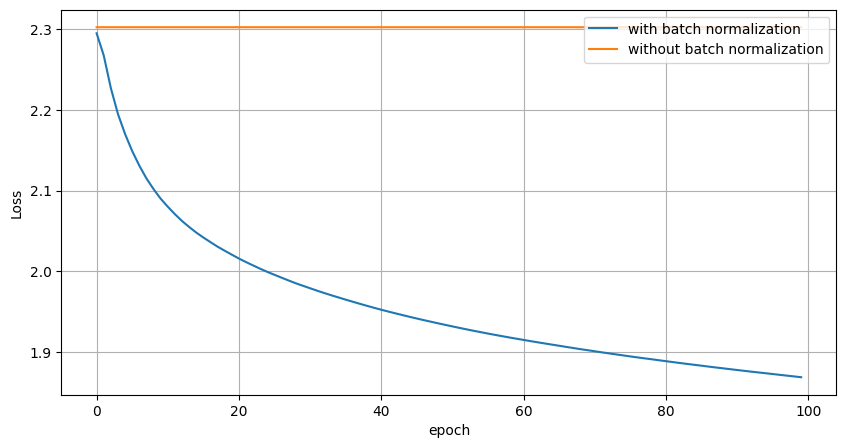

In [102]:
losses = [avg_train_losses_bn, avg_train_losses_no_bn]
labels = ['with batch normalization', 'without batch normalization']

plot_losses(losses, labels)

# Implementation early stopping (regularization technique)

In [75]:
# import EarlyStopping
from pytorchtools import EarlyStopping

In [76]:
# train the model
def model_earlystopping_tech(model, batch_size_, patience, epochs_):
    
    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = [] 
    
    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=patience, verbose=True)
    
    for epoch in range(1, epochs_ + 1):
        # prep model for training
        model.train() 
        for batch, (images, labels) in enumerate(train_loader_, 1):
            images = images.view(-1, 32 * 32 * 3)
            # clear the gradients of all optimized variables
            optimizer_.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            predic_labels = model(images)
            # calculate the loss
            loss_train = criterion(predic_labels, labels)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss_train.backward()
            # perform a single optimization step (parameter update)
            optimizer_.step()
            # record training loss
            train_losses.append(loss_train.item())

        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        avg_train_losses.append(train_loss)

    
        # validate the model 
        model.eval() # prep model for evaluation
        for data, target in val_loader_:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss_val = criterion(output, target)
            # record validation loss
            valid_losses.append(loss_val.item())

        # print training/validation statistics 
        # calculate average loss over an epoch
        
        valid_loss = np.average(valid_losses)
        avg_valid_losses.append(valid_loss)
        
        epoch_len = len(str(epochs_))
        
        print_msg = (f'[{epoch:>{epoch_len}}/{epochs_:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')
        
        print(print_msg)
        
        # clear lists to track next epoch
        train_losses = []
        valid_losses = []
        
        # early_stopping needs the validation loss to check if it has decresed, 
        # and if it has, it will make a checkpoint of the current model
        early_stopping(valid_loss, model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
            
    # load the last checkpoint with the best model
    model.load_state_dict(torch.load('checkpoint.pt'))
    
    return model, avg_train_losses, avg_valid_losses

In [77]:
patience = 50

model, train_loss, valid_loss = model_earlystopping_tech(model_CIFAR10_bn, batch_size_, patience, epochs_)

[  1/100] train_loss: 1.74206 valid_loss: 2.26692
Validation loss decreased (inf --> 2.266917).  Saving model ...
[  2/100] train_loss: 1.74191 valid_loss: 2.26955
EarlyStopping counter: 1 out of 50
[  3/100] train_loss: 1.74040 valid_loss: 2.27142
EarlyStopping counter: 2 out of 50
[  4/100] train_loss: 1.74349 valid_loss: 2.26508
Validation loss decreased (2.266917 --> 2.265078).  Saving model ...
[  5/100] train_loss: 1.74063 valid_loss: 2.26561
EarlyStopping counter: 1 out of 50
[  6/100] train_loss: 1.73820 valid_loss: 2.27243
EarlyStopping counter: 2 out of 50
[  7/100] train_loss: 1.74041 valid_loss: 2.27260
EarlyStopping counter: 3 out of 50
[  8/100] train_loss: 1.73545 valid_loss: 2.26936
EarlyStopping counter: 4 out of 50
[  9/100] train_loss: 1.73398 valid_loss: 2.26932
EarlyStopping counter: 5 out of 50
[ 10/100] train_loss: 1.73618 valid_loss: 2.27193
EarlyStopping counter: 6 out of 50
[ 11/100] train_loss: 1.73541 valid_loss: 2.28010
EarlyStopping counter: 7 out of 50
[ 

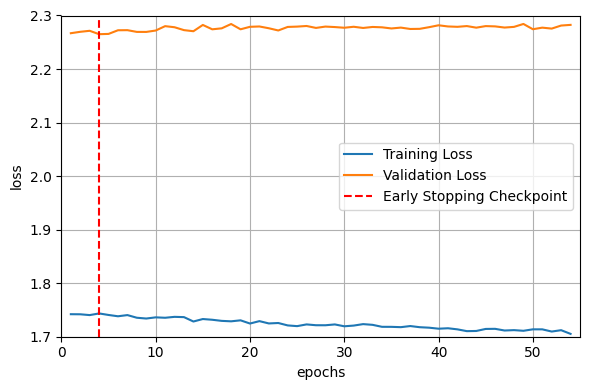

In [105]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(6, 4))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(valid_loss))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(1.7, 2.3) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Implementation self normalization approach

In [114]:
class CIFAR10_NN_self_norm(nn.Module):

    def __init__(self, features_num: int, labels_num: int, hidden_num: int, hidden_width: int, *args, **kwargs) -> None:
        super(*args, **kwargs).__init__()

        self.flatten = nn.Flatten()
        self.inputLayer = nn.Linear(features_num, hidden_width)    # <--- The input layer is dense.
        self.selu = nn.SELU()   # <--- The activation function of SNNs are SELUs.
        
        self.hiddenLayers = []
        for i in range(hidden_num):
            self.hiddenLayers.append(nn.Linear(hidden_width, hidden_width))   # <--- The hidden layers are dense.
            
        self.hiddenLayers = nn.ModuleList(self.hiddenLayers)  
        self.bn_hiddenLayers = nn.BatchNorm1d(hidden_width)
        
        self.outputLayer = nn.Linear(hidden_width, labels_num)
        self.soft = nn.Softmax(dim = 1)
 
        for param in self.parameters():   # <--- Initializing the network's parameters
            # biases zero
            if len(param.shape) == 1:   # if self.bias:
                nn.init.constant_(param, 0)
            # weights using lecun-normal initialization
            else:
                nn.init.kaiming_normal_(param, mode='fan_in', nonlinearity='linear')

    def forward(self, x):
        x = self.flatten(x)
        x = self.selu(self.inputLayer(x))
            
        for layer in self.hiddenLayers:
            x = self.selu(self.bn_hiddenLayers(layer(x)))
        
        return self.soft(self.outputLayer(x))

In [115]:
model_self_norm = CIFAR10_NN_self_norm(32 * 32 * 3, 10, 20, 100)

## Training Loop (SNN approach)

In [116]:
# training loop
for epoch_ in range(epochs_):
    # print(f'EPOCH {epoch + 1}:')
    for images, labels in train_loader_:
        # Flatten the images
        images = images.view(-1, 32 * 32 * 3)
        predic_labels_snn = model_self_norm(images)
        # Zero the gradients
        optimizer_.zero_grad()
        # Forward pass
        loss_snn = criterion(predic_labels_snn, labels)
        # Backward pass and optimization
        loss_snn.backward()
        optimizer_.step()
    # print(f'loss: {loss}')

## Evaluation the model

In [124]:
correct = 0
total = 0
with torch.no_grad():
    for images_, labels_ in test_loader_:
        images_ = images_.view(-1, 32*32*3)
        outputs_ = model_self_norm(images_)
        _, predicted_ = torch.max(outputs_.data, 1)
        total += labels_.size(0)
        correct += (predicted_ == labels_).sum().item()

accuracy_ = 100 * correct / total
print("Accuracy: {:.2f}%".format(accuracy_))

Accuracy: 10.00%
